<a href="https://colab.research.google.com/github/202218031/DM_Project_2/blob/202218057_Anushka/DM_CP02_202218057_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [5]:
df=pd.read_csv("/content/smoking_driking_dataset_Ver01.csv")

In [6]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759025 entries, 0 to 759024
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               759025 non-null  object 
 1   age               759025 non-null  int64  
 2   height            759025 non-null  int64  
 3   weight            759025 non-null  int64  
 4   waistline         759025 non-null  float64
 5   sight_left        759025 non-null  float64
 6   sight_right       759025 non-null  float64
 7   hear_left         759025 non-null  float64
 8   hear_right        759024 non-null  float64
 9   SBP               759024 non-null  float64
 10  DBP               759024 non-null  float64
 11  BLDS              759024 non-null  float64
 12  tot_chole         759024 non-null  float64
 13  HDL_chole         759024 non-null  float64
 14  LDL_chole         759024 non-null  float64
 15  triglyceride      759024 non-null  float64
 16  hemoglobin        75

In [8]:
df.shape

(759025, 24)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(759024, 24)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(759005, 24)

In [13]:
df['sex'].value_counts()

Male      403038
Female    355967
Name: sex, dtype: int64

In [14]:
df.replace({'sex': {'Male': 0, 'Female': 1}}, inplace = True)
df['sex'].value_counts()

0    403038
1    355967
Name: sex, dtype: int64

In [15]:
df.replace({'DRK_YN':{'Y':1, 'N':0}}, inplace = True)
df['DRK_YN'].value_counts()

0    379884
1    379121
Name: DRK_YN, dtype: int64

In [16]:
df.groupby('DRK_YN').mean()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
DRK_YN,,,,,,,,,,,,,,,,,,,,,
0,0.652728,51.654834,158.770954,59.997789,80.156723,0.935203,0.934008,1.041602,1.040633,121.962344,...,56.184111,114.566165,121.567468,13.755611,1.095763,0.830452,25.070127,24.129671,26.837050,1.321564
1,0.284885,43.578277,165.727433,66.594333,82.333016,1.027136,1.023667,1.021283,1.020484,122.914212,...,57.655891,111.521541,142.841394,14.704244,1.092823,0.889805,26.912363,27.397090,47.456627,1.895076


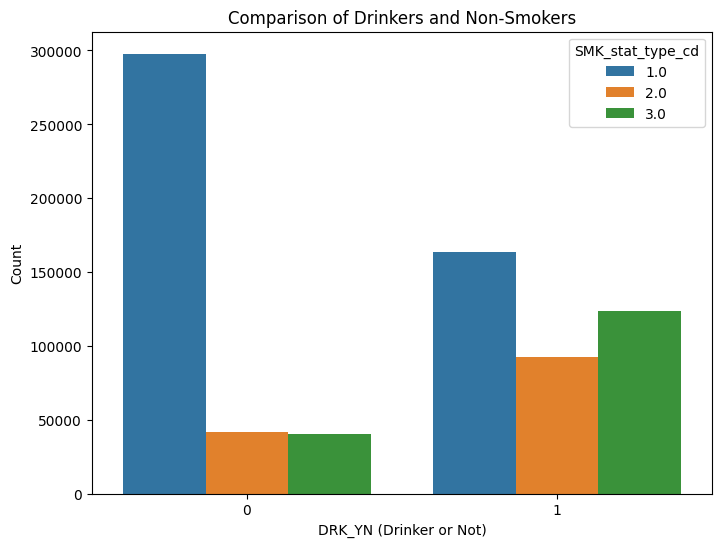

                            count       mean        std   min   25%   50%  \
DRK_YN SMK_stat_type_cd                                                     
0      1.0               297852.0  52.003529  14.451014  20.0  40.0  55.0   
       2.0                41907.0  54.292839  13.468632  20.0  45.0  55.0   
       3.0                40125.0  46.311277  13.404246  20.0  35.0  45.0   
1      1.0               163320.0  41.991734  13.241602  20.0  30.0  40.0   
       2.0                92260.0  48.220247  12.287922  20.0  40.0  50.0   
       3.0               123541.0  42.209064  11.538055  20.0  35.0  40.0   

                          75%   max  
DRK_YN SMK_stat_type_cd              
0      1.0               60.0  85.0  
       2.0               65.0  85.0  
       3.0               55.0  85.0  
1      1.0               50.0  85.0  
       2.0               55.0  85.0  
       3.0               50.0  85.0  


In [17]:
# Countplot to compare the number of drinkers and non-drinkers
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DRK_YN', hue='SMK_stat_type_cd')
plt.title('Comparison of Drinkers and Non-Smokers')
plt.xlabel('DRK_YN (Drinker or Not)')
plt.ylabel('Count')
plt.show()

# Summary statistics for drinkers and non-drinkers
summary = df.groupby(['DRK_YN', 'SMK_stat_type_cd'])['age'].describe()
print(summary)


In [18]:
# Converting Obejcts into numerical data types
LabelEncoder = preprocessing.LabelEncoder()
df.sex= LabelEncoder.fit_transform(df["sex"])
df.DRK_YN = LabelEncoder.fit_transform(df["DRK_YN"])

In [19]:
df["DRK_YN"].value_counts(), # Drinkers
df["SMK_stat_type_cd"].value_counts() #smokers

1.0    461172
3.0    163666
2.0    134167
Name: SMK_stat_type_cd, dtype: int64

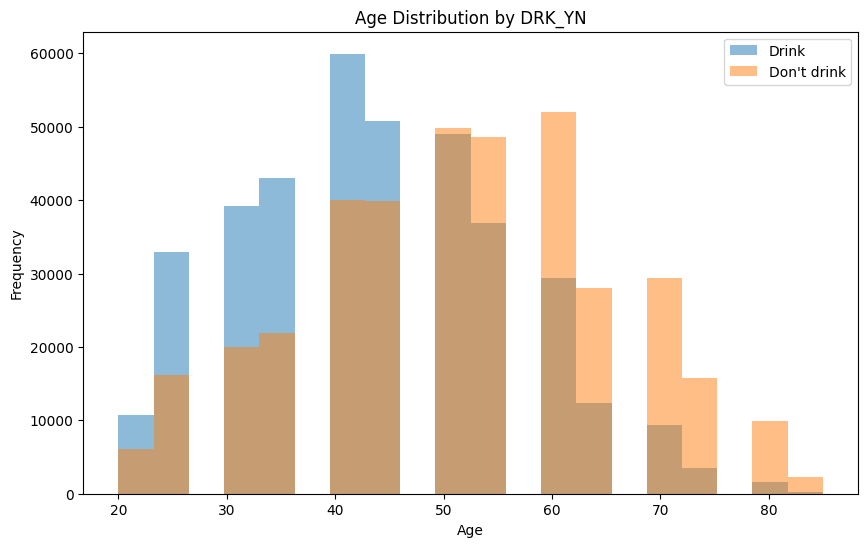

In [20]:
# Filter data based on DRK_YN values
drk_1 = df[df['DRK_YN'] == 1]
drk_2 = df[df['DRK_YN'] == 0]


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='Drink')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label="Don't drink")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()

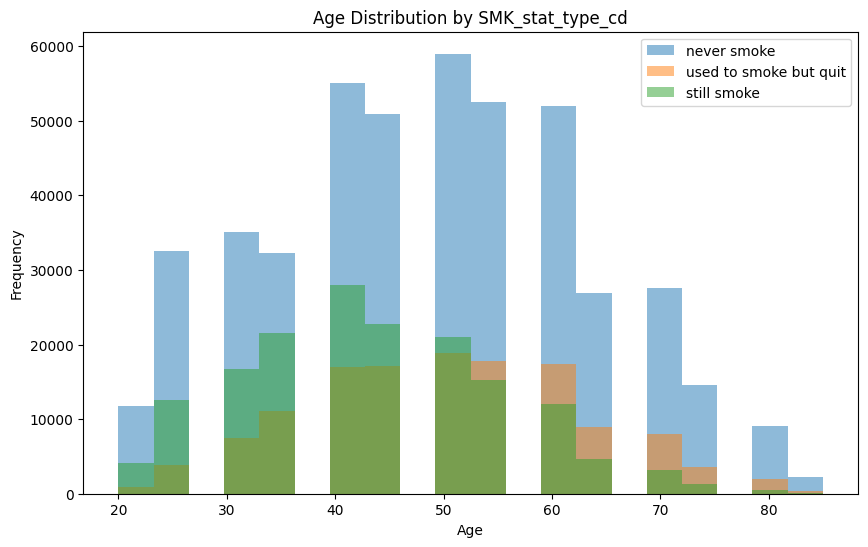

In [21]:
# Filter data based on SMK values
smk_1 = df[df['SMK_stat_type_cd'] == 1]
smk_2 = df[df['SMK_stat_type_cd'] == 2]
smk_3 = df[df['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(smk_1['age'],bins=20, alpha=0.5, label='never smoke')
plt.hist(smk_2['age'],bins=20, alpha=0.5,label='used to smoke but quit')
plt.hist(smk_3['age'],bins=20, alpha=0.5,label='still smoke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

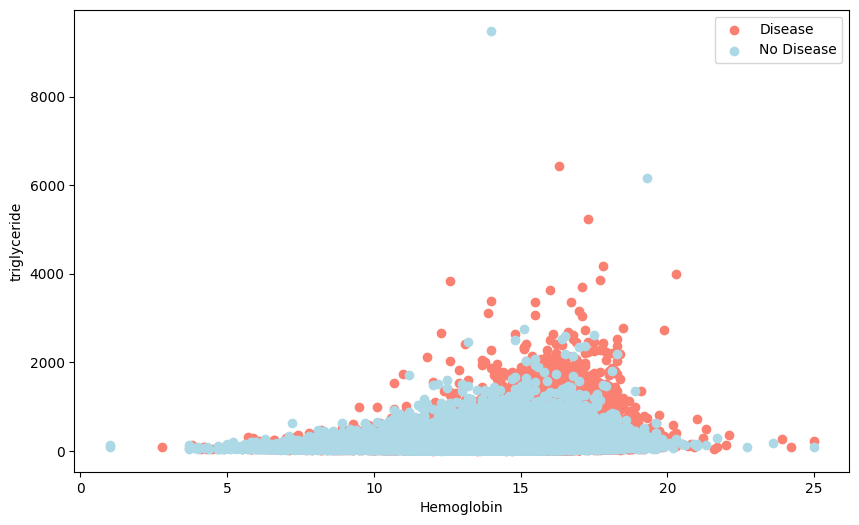

In [22]:
#Heamoglovin vs triglyceride
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.hemoglobin[df.DRK_YN==1],
            df.triglyceride[df.DRK_YN==1],
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.hemoglobin[df.DRK_YN==0],
            df.triglyceride[df.DRK_YN==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.xlabel("Hemoglobin")
plt.legend(["Drinker", "Non Drinker"])
plt.ylabel("triglyceride");

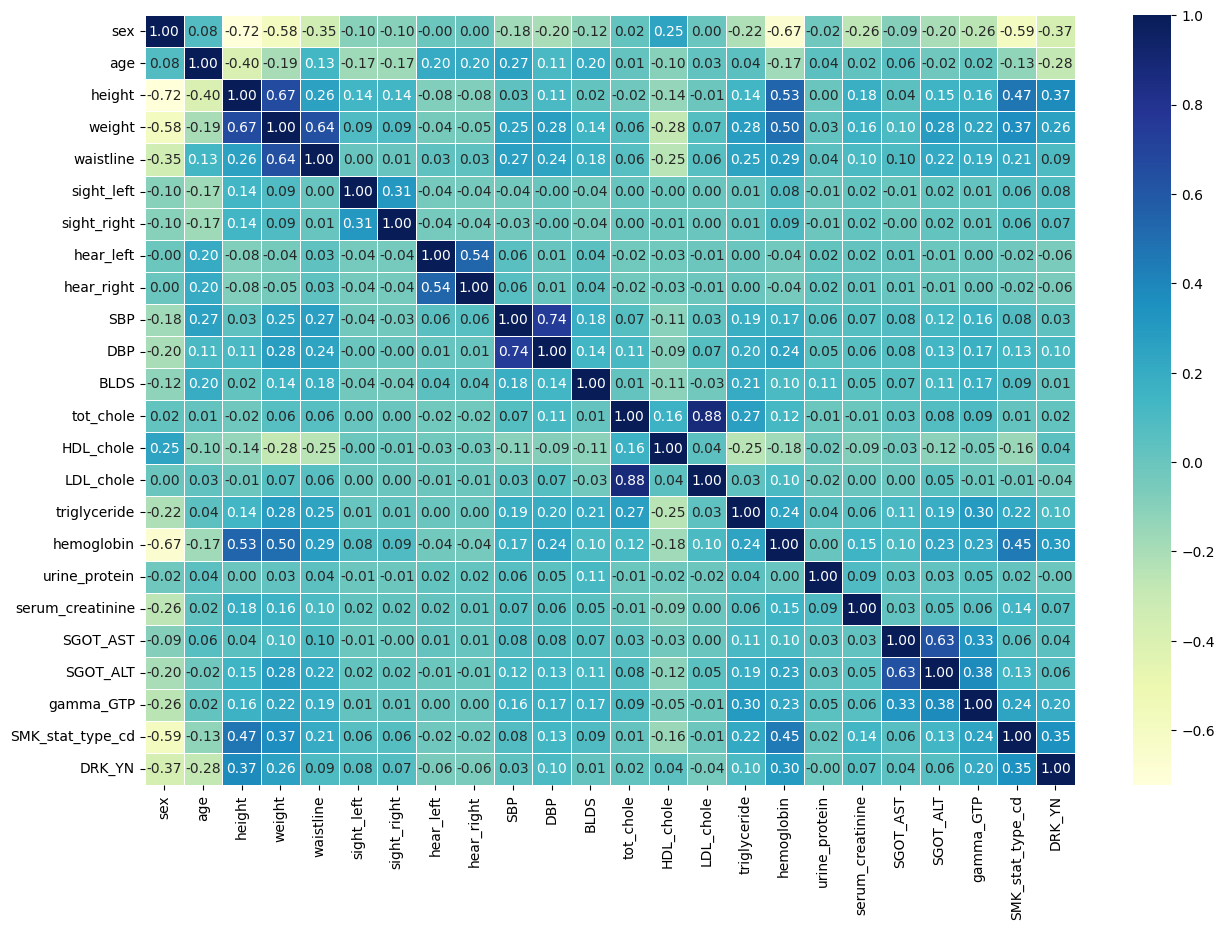

In [23]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

##Correlated features related to drinking

In [24]:
correlation_threshold = 0.1
DRK_features = []
for feature in corr_matrix.columns:
    if feature != 'DRK_YN' and (corr_matrix[feature]['DRK_YN'] > correlation_threshold or
                                corr_matrix[feature]['DRK_YN'] < -correlation_threshold):
        DRK_features.append(feature)

print("Correlated features with 'DRK_YN':")
print(DRK_features)

Correlated features with 'DRK_YN':
['sex', 'age', 'height', 'weight', 'DBP', 'triglyceride', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd']


##Correlated features related to smoking

In [25]:
correlation_threshold = 0.1
SMK_features = []
for feature in corr_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (corr_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                corr_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with SMK_stat_type_cd:")
print(SMK_features)

Correlated features with SMK_stat_type_cd:
['sex', 'age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']


In [26]:
x=df[DRK_features]
y=df["DRK_YN"]

##**Training models for drinkers**

##Logistic regression and support vector classifier

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_test.shape,y_train.shape
lgr_model = LogisticRegression(max_iter=1000, fit_intercept=False)  # Set fit_intercept=False
lgr_model.fit(x_train, y_train)

svc_model = svm.LinearSVC(max_iter=1000)
svc_model.fit(x_train, y_train)

y_pred_lgr = lgr_model.predict(x_test)
y_pred_svc = svc_model.predict(x_test)

accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Logistic Regression Accuracy:", accuracy_lgr)
print("SVM Accuracy:", accuracy_svc)

Logistic Regression Accuracy: 0.7132495833360781
SVM Accuracy: 0.5976772221526867


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:
print(precision_score(y_test, y_pred_lgr))
print(f1_score(y_test, y_pred_lgr))
print(recall_score(y_test, y_pred_lgr))

0.7193549259219206
0.7097273254689616
0.7003540265585723


##Random forset classifier

In [29]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
score1=accuracy_score(y_test,y_pred)
print("Accuracy for Random forest:",score1)

Accuracy for Random forest: 0.710008497967734


##Feature importance used by model

In [30]:
feature_importances = model3.feature_importances_
importance_dict = dict(zip(x_train.columns, feature_importances))
importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")


triglyceride: 0.19033341471667195
hemoglobin: 0.1607005093999291
gamma_GTP: 0.14569594812286701
DBP: 0.13422443896892447
age: 0.09350961934766991
weight: 0.0756647527231499
height: 0.07280303349482667
SMK_stat_type_cd: 0.06528976732377112
sex: 0.06177851590218975
